<a href="https://colab.research.google.com/github/ShubhamBhadula/BOOK-RECOMMENDATION-SYATEM/blob/main/python_ca_2_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

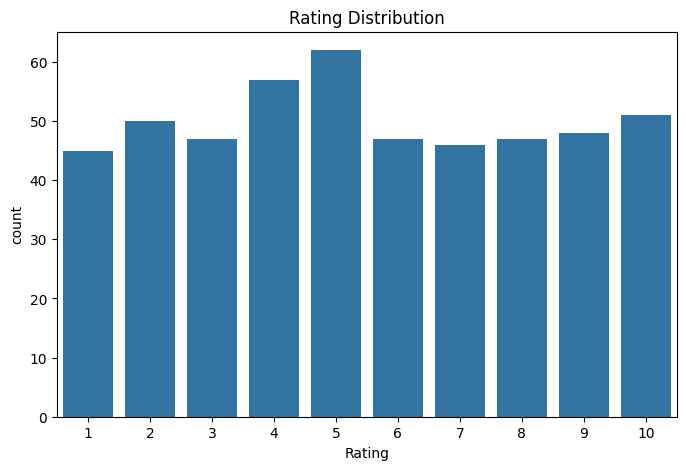

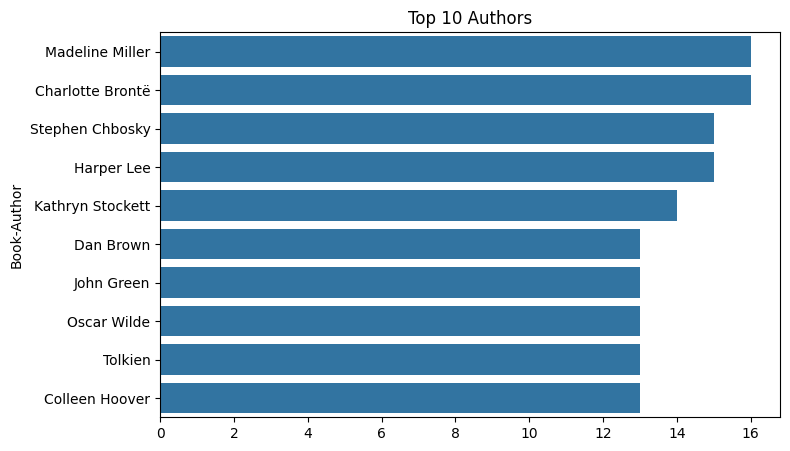

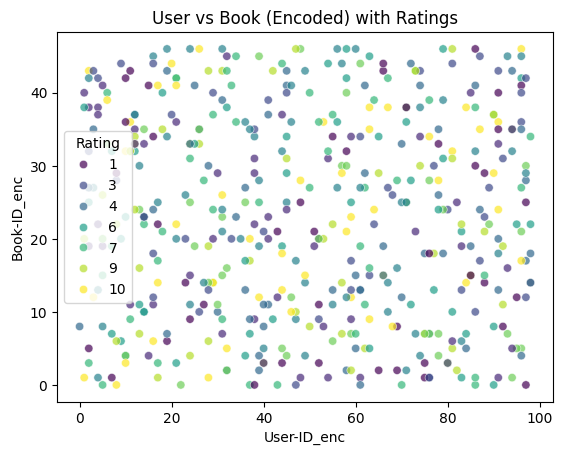


Correlation Matrix:
              User-ID_enc  Book-ID_enc    Rating
User-ID_enc     1.000000    -0.031604 -0.040304
Book-ID_enc    -0.031604     1.000000 -0.011814
Rating         -0.040304    -0.011814  1.000000

Covariance Matrix:
              User-ID_enc  Book-ID_enc    Rating
User-ID_enc   844.498032   -12.748156 -3.312361
Book-ID_enc   -12.748156   192.674449 -0.463768
Rating         -3.312361    -0.463768  7.997932

Model: Linear
MSE: 8.38588478544103
RMSE: 2.895839219542589
R² Score: -0.06286325370930301

Model: Random Forest
MSE: 11.872381659160997
RMSE: 3.445632258259868
R² Score: -0.5047569245695123

Model: XGBoost
MSE: 14.736549377441406
RMSE: 3.838821352634348
R² Score: -0.8677740097045898

Model: Ridge
MSE: 8.385883841644132
RMSE: 2.8958390565851775
R² Score: -0.06286313408840805

Model: Lasso
MSE: 8.376620088437361
RMSE: 2.8942391208117826
R² Score: -0.061689005999741475

Polynomial Regression Coefficients:
Slope: [ 0.          0.00682982 -0.01113339 -0.0001918   0.0003

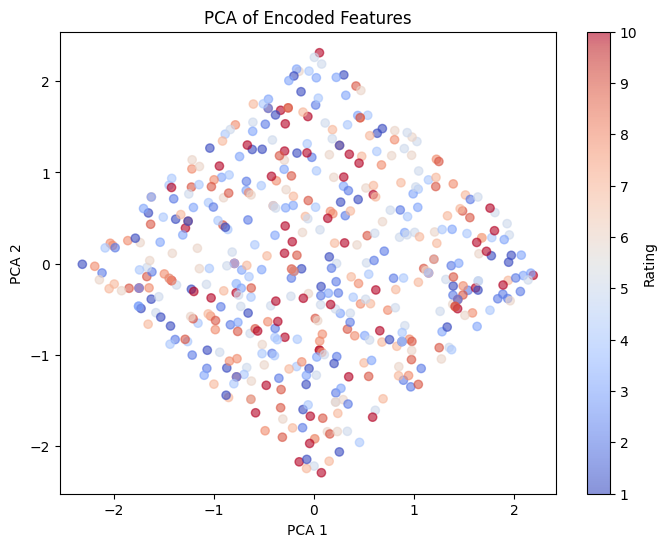


Cross Validation R² Scores: [-0.0437479  -0.00057269 -0.04627171 -0.00689745 -0.05280413]
Mean CV Score: -0.030058775820894203

Gradient Descent Result:
Slope (m): -2.1301782780078313e+180, Intercept (b): -3.197258861958539e+178


In [25]:
# Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load datasets
books = pd.read_excel("/content/drive/MyDrive/RealisticBooks.xlsx")
ratings = pd.read_excel("/content/drive/MyDrive/RealisticRatings.xlsx")

# Data Cleaning
books.drop_duplicates(subset='Book-ID', inplace=True)
ratings.dropna(inplace=True)

# Merge for full dataset
merged = ratings.merge(books, on='Book-ID', how='inner')

# Label encoding
le_user = LabelEncoder()
le_book = LabelEncoder()
merged['User-ID_enc'] = le_user.fit_transform(merged['User-ID'])
merged['Book-ID_enc'] = le_book.fit_transform(merged['Book-ID'])

# Feature and target
X = merged[['User-ID_enc', 'Book-ID_enc']]
y = merged['Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# EDA - Visualizations
plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=merged)
plt.title("Rating Distribution")
plt.show()

plt.figure(figsize=(8,5))
top_authors = merged['Book-Author'].value_counts().head(10)
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title("Top 10 Authors")
plt.show()

# Scatter: User vs Book Encoding
sns.scatterplot(data=merged, x='User-ID_enc', y='Book-ID_enc', hue='Rating', palette='viridis', alpha=0.7)
plt.title("User vs Book (Encoded) with Ratings")
plt.show()

# Correlation & Covariance
corr_matrix = merged[['User-ID_enc', 'Book-ID_enc', 'Rating']].corr()
print("\nCorrelation Matrix:\n", corr_matrix)

cov_matrix = merged[['User-ID_enc', 'Book-ID_enc', 'Rating']].cov()
print("\nCovariance Matrix:\n", cov_matrix)

# Models
models = {
    'Linear': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))

# Polynomial Regression & Regularization (slope + intercept)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print("\nPolynomial Regression Coefficients:")
print("Slope:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

# Dimensionality Reduction with PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("PCA of Encoded Features")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Rating')
plt.show()

# Cross Validation
model_cv = LinearRegression()
cv_scores = cross_val_score(model_cv, X, y, cv=5, scoring='r2')
print("\nCross Validation R² Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Gradient Descent (Simplified Linear Regression)
def gradient_descent(X, y, learning_rate=0.01, epochs=100):
    m, b = 0, 0
    n = len(y)
    for _ in range(epochs):
        y_pred = m * X + b
        D_m = (-2/n) * sum(X * (y - y_pred))
        D_b = (-2/n) * sum(y - y_pred)
        m = m - learning_rate * D_m
        b = b - learning_rate * D_b
    return m, b

m, b = gradient_descent(X['User-ID_enc'].values, y.values)
print(f"\nGradient Descent Result:\nSlope (m): {m}, Intercept (b): {b}")


In [27]:
import pandas as pd
from difflib import get_close_matches
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

merged_data = pd.merge(ratings, books, on='Book-ID')

# Encode User-ID and Book-ID
le_user = LabelEncoder()
le_book = LabelEncoder()

merged_data['User-ID-Encoded'] = le_user.fit_transform(merged_data['User-ID'])
merged_data['Book-ID-Encoded'] = le_book.fit_transform(merged_data['Book-ID'])

# Encode Book-ID for books dataframe
books_encoded = books.copy()
books_encoded['Book-ID-Encoded'] = le_book.transform(books_encoded['Book-ID'])

# Train the model
X_train = merged_data[['User-ID-Encoded', 'Book-ID-Encoded']]
y_train = merged_data['Rating']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Recommendation function
def recommend_books(book_title_input):
    book_title_input = book_title_input.lower().strip()
    books_lookup = books_encoded.copy()
    books_lookup['Book-Title-Lower'] = books_lookup['Book-Title'].str.lower()

    if book_title_input not in books_lookup['Book-Title-Lower'].values:
        close_matches = get_close_matches(book_title_input, books_lookup['Book-Title-Lower'].tolist(), n=3, cutoff=0.6)
        if close_matches:
            suggestions = [title.title() for title in close_matches]
            return f"Book not found. Did you mean: {', '.join(suggestions)}?"
        return "Book not found."

    book_row = books_lookup[books_lookup['Book-Title-Lower'] == book_title_input].iloc[0]
    book_enc = book_row['Book-ID-Encoded']

    predictions = []
    for uid in le_user.classes_:
        user_enc = le_user.transform([uid])[0]
        pred_rating = model.predict([[user_enc, book_enc]])[0]
        predictions.append((uid, pred_rating))

    predictions.sort(key=lambda x: x[1], reverse=True)
    top_user_ids = [uid for uid, _ in predictions[:5]]
    top_user_enc = le_user.transform(top_user_ids)

    top_user_data = merged_data[merged_data['User-ID-Encoded'].isin(top_user_enc)]
    top_books = (
        top_user_data.groupby('Book-ID')['Rating']
        .mean()
        .sort_values(ascending=False)
        .head(5)
        .index
    )

    recommended = books[books['Book-ID'].isin(top_books)].drop_duplicates('Book-Title')
    result = recommended[['Book-Title', 'Book-Author', 'Image-URL']].values.tolist()
    return result

# Input loop
while True:
    user_input = input("\nEnter a book title (or type 'exit' to quit): ")
    if user_input.lower() == "exit":
        print("Goodbye!")
        break
    output = recommend_books(user_input)
    if isinstance(output, str):
        print(output)
    else:
        print("\nRecommended books:")
        for title, author, image in output:
            print(f"- {title} by {author}\n  Cover: {image}")



Enter a book title (or type 'exit' to quit): wild animus
Book not found.

Enter a book title (or type 'exit' to quit): the road

Recommended books:
- Pride and Prejudice by Jane Austen
  Cover: http://image.url/book4.jpg
- The Lord of the Rings by Kathryn Stockett
  Cover: http://image.url/book21.jpg
- Life of Pi by Cormac McCarthy
  Cover: http://image.url/book25.jpg
- A Thousand Splendid Suns by Margaret Atwood
  Cover: http://image.url/book35.jpg
- Room by Erin Morgenstern
  Cover: http://image.url/book40.jpg

Enter a book title (or type 'exit' to quit): life of pi

Recommended books:
- The Help by Arthur Golden
  Cover: http://image.url/book22.jpg
- The Shining by Yann Martel
  Cover: http://image.url/book24.jpg
- Life of Pi by Cormac McCarthy
  Cover: http://image.url/book25.jpg
- The Lovely Bones by Stephenie Meyer
  Cover: http://image.url/book30.jpg
- Slaughterhouse-Five by Stephen Chbosky
  Cover: http://image.url/book36.jpg

Enter a book title (or type 'exit' to quit): exity